In [58]:
import pandas as pd
import glob
import os


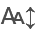

In [59]:
# pip install itables
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
from itables import show
# show(df, maxBytes=0)

# Showing index
import itables.options as opt
opt.showIndex = True

# Turning off downsampling of data while printing it
import itables.options as opt
opt.maxBytes = 0

# Importing Data

In [60]:
path_compiled_data = r"D:\PhenoCrop\3_qgis\OAT_FRONTIERS\2. pivoted"
all_files_final = glob.glob(path_compiled_data + "/*.xlsx")
all_files_final

['D:\\PhenoCrop\\3_qgis\\OAT_FRONTIERS\\2. pivoted\\Gene2Bread 2024 Vollebekk.xlsx',
 'D:\\PhenoCrop\\3_qgis\\OAT_FRONTIERS\\2. pivoted\\OatFrontiers 2024 Vollebekk.xlsx']

In [61]:
path_agro_data = r"D:\PhenoCrop\3_qgis\OAT_FRONTIERS\AGRO DATA"
all_files_agro = glob.glob(path_agro_data + "/*.xlsx")
all_files_agro

['D:\\PhenoCrop\\3_qgis\\OAT_FRONTIERS\\AGRO DATA\\GENE2BREAD Registreringer G2B_Vollebekk 2024_1.xlsx']

In [62]:
# Importing all the datasets except those from Mavic3RGB images since we need the Multispectral data only

list_df_compiled = []
for filepath in all_files_final:
    file_name=os.path.basename(filepath).split(".")[0].replace('-','_')

    list_df_compiled.append(file_name)
    
    # print(filepath,os.path.basename(filepath[:-5]))
    locals()[file_name] = pd.read_excel(filepath)
    print(file_name, '=====', locals()[file_name].shape)

Gene2Bread 2024 Vollebekk ===== (14580, 19)
OatFrontiers 2024 Vollebekk ===== (12960, 19)


In [63]:
list_df_compiled

['Gene2Bread 2024 Vollebekk', 'OatFrontiers 2024 Vollebekk']

In [64]:
df_g2b = locals()['Gene2Bread 2024 Vollebekk']
df_oatf = locals()['OatFrontiers 2024 Vollebekk']

In [65]:
# Importing all the datasets except those from Mavic3RGB images since we need the Multispectral data only

list_df_agro = []
for filepath in all_files_agro:
    file_name=os.path.basename(filepath).split(".")[0].replace('-','_')

    list_df_agro.append(file_name)
    
    # print(filepath,os.path.basename(filepath[:-5]))
    locals()[file_name] = pd.read_excel(filepath)
    print(file_name, '=====', locals()[file_name].shape)

GENE2BREAD Registreringer G2B_Vollebekk 2024_1 ===== (100, 20)


In [66]:
df_g2b_Agro = locals()['GENE2BREAD Registreringer G2B_Vollebekk 2024_1']

In [71]:
df_g2b_Agro.head(2)

Rute  REP     Name Aksskyting  Høyde (cm) 23/7  Unnamed: 5  Høyde (cm)  \
0   101    1  GN08568 2024-06-26               79          80        79.5   
1   102    1  GN04603 2024-06-26               77          75        76.0   

          GM  Legde % v høsting  Legde % 1/8  Legde % 14/8  Råvekt (kg)  \
0 2024-08-19                 10          NaN           NaN         5.53   
1 2024-08-14                  0          NaN           NaN         4.70   

   Tørrvekt (kg)  vann% v høsting  kg 15% vann  kg/daa 15% vann  Hl (kg/hl)  \
0           4.98        21.652803     5.097176       637.147059     78.0264   
1           4.36        19.293617     4.462588       557.823529     75.8214   

   Protein %     TKV(g)       GPD  
0       13.0  38.567729 -0.775403  
1       14.3  39.000000  0.040724

In [69]:
df_g2b.head(2)

ID   Location       Field   Camera Flight Height  count  majority  \
0  100 - G2B  Vollebekk  Gene2Bread  Mavic3M           20m  71493  0.053825   
1  100 - G2B  Vollebekk  Gene2Bread  Mavic3M           20m  71493  0.739483   

        max      mean    median       min  minority     range     stdev  \
0  0.136718  0.050909  0.050052  0.022936  0.022936  0.113782  0.009948   
1  0.877471  0.735383  0.750416  0.281121  0.281121  0.596351  0.076320   

            sum  variance  variety        Date Spectrum  
0   3639.601721  0.000099    71210  2024-06-03    green  
1  52574.768638  0.005825    70839  2024-06-03     ndvi

# Replacing the  - G2B text from the IDs in the Gene2Bread spectral df

In [99]:
df_g2b['ID'] = df_g2b['ID'].str.replace(' - G2B','').astype(int)

In [100]:
df_g2b.head(2)

ID   Location       Field   Camera Flight Height  count  majority  \
0  100  Vollebekk  Gene2Bread  Mavic3M           20m  71493  0.053825   
1  100  Vollebekk  Gene2Bread  Mavic3M           20m  71493  0.739483   

        max      mean    median       min  minority     range     stdev  \
0  0.136718  0.050909  0.050052  0.022936  0.022936  0.113782  0.009948   
1  0.877471  0.735383  0.750416  0.281121  0.281121  0.596351  0.076320   

            sum  variance  variety        Date Spectrum  
0   3639.601721  0.000099    71210  2024-06-03    green  
1  52574.768638  0.005825    70839  2024-06-03     ndvi

# Replacing the  - OatFrontiers text from the IDs in the OatFrontiers spectral df

In [78]:
df_oatf['ID'] = df_oatf['ID'].str.replace(' - OatFrontiers','')

In [79]:
df_oatf.head()

ID   Location         Field   Camera Flight Height  count  majority  \
0  100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.035927   
1  100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.844960   
2  100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.273246   
3  100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.020498   
4  100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.094931   

        max      mean    median       min  minority     range     stdev  \
0  0.207103  0.064417  0.058468  0.025437  0.025437  0.181665  0.022645   
1  0.906998  0.714183  0.754478  0.209893  0.209893  0.697105  0.136105   
2  0.450186  0.265904  0.264987  0.104734  0.104734  0.345452  0.051491   
3  0.202308  0.044517  0.035694  0.014417  0.014417  0.187891  0.025534   
4  0.245525  0.127388  0.126141  0.049972  0.049972  0.195553  0.027024   

            sum  variance  variety        Date Spectrum  
0   4605.436468  0.000513    71298  2024-06-03    green  
1  51059.784395  0.018525    71062  2024-06-03     ndvi  
2  19010.572993  0.002651    71157  2024-06-03      nir  
3   3182.670527  0.000652    71354  2024-06-03      red  
4   9107.464193  0.000730    71179  2024-06-03  rededge

# Correcting the datatype of ID Entries

The datatype of ID entries in Spectral DFs is str but to be able to merge it with Agro data, it should be int64

In [103]:
import pandas as pd

def convert_column_to_int(df, column_name):
    """
    Converts values in a specified column to integers if possible.
    Non-convertible values (strings or other types) are left unchanged.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column.
    - column_name (str): The name of the column to convert.

    Returns:
    - pd.DataFrame: The DataFrame with the column updated.
    """
    def safe_convert(value):
        try:
            # Try to convert to integer
            return int(value)
        except ValueError:
            # If conversion fails, return the value as it is
            return value

    # Apply the safe_convert function to the specified column
    df[column_name] = df[column_name].apply(safe_convert)

    return df


In [104]:
convert_column_to_int(df_oatf, 'ID')

ID   Location         Field   Camera Flight Height  count  majority  \
0      100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.035927   
1      100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.844960   
2      100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.273246   
3      100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.020498   
4      100b  Vollebekk  OatFrontiers  Mavic3M           20m  71494  0.094931   
...     ...        ...           ...      ...           ...    ...       ...   
12955  811b  Vollebekk  OatFrontiers  Mavic3M           20m  74644  0.050524   
12956  811b  Vollebekk  OatFrontiers  Mavic3M           20m  74644  0.281085   
12957  811b  Vollebekk  OatFrontiers  Mavic3M           20m  74644  0.098565   
12958  811b  Vollebekk  OatFrontiers  Mavic3M           20m  74644  0.076577   
12959  811b  Vollebekk  OatFrontiers  Mavic3M           20m  74644  0.083517   

            max      mean    median       min  minority     range     stdev  \
0      0.207103  0.064417  0.058468  0.025437  0.025437  0.181665  0.022645   
1      0.906998  0.714183  0.754478  0.209893  0.209893  0.697105  0.136105   
2      0.450186  0.265904  0.264987  0.104734  0.104734  0.345452  0.051491   
3      0.202308  0.044517  0.035694  0.014417  0.014417  0.187891  0.025534   
4      0.245525  0.127388  0.126141  0.049972  0.049972  0.195553  0.027024   
...         ...       ...       ...       ...       ...       ...       ...   
12955  0.123233  0.058449  0.058179  0.017652  0.017652  0.105582  0.014033   
12956  0.675615  0.411189  0.400904  0.191052  0.191052  0.484563  0.083233   
12957  0.347887  0.185515  0.184847  0.069826  0.069826  0.278061  0.042814   
12958  0.167553  0.076925  0.076277  0.025997  0.025997  0.141556  0.018642   
12959  0.258174  0.123755  0.123268  0.036413  0.036413  0.221762  0.030243   

                sum  variance  variety        Date Spectrum  
0       4605.436468  0.000513    71298  2024-06-03    green  
1      51059.784395  0.018525    71062  2024-06-03     ndvi  
2      19010.572993  0.002651    71157  2024-06-03      nir  
3       3182.670527  0.000652    71354  2024-06-03      red  
4       9107.464193  0.000730    71179  2024-06-03  rededge  
...             ...       ...      ...         ...      ...  
12955   4362.836640  0.000197    74396  2024-08-26    green  
12956  30692.820876  0.006928    74345  2024-08-26     ndvi  
12957  13847.549923  0.001833    74380  2024-08-26      nir  
12958   5742.024558  0.000348    74356  2024-08-26      red  
12959   9237.604745  0.000915    74386  2024-08-26  rededge  

[12960 rows x 19 columns]

In [113]:
df_oatf.to_excel(os.path.join(path_compiled_data, "Oats 2024 Vollebekk with Agro.xlsx"), index=False)

# Comparing the IDs in the both dfs

Border plots are not usually part of the Agro Data. So there has to be a mismatch in IDs from Agro Data and the spectral data

In [160]:
field_name = 'Gene2Bread 2024'
project_name = 'Gene2Bread'
location = "Vollebekk"
year = "2024"

In [161]:
# Merge df1 and df2 based on matching 'ID' and 'Rute'
merged_df = pd.merge(df_g2b, df_g2b_Agro, left_on='ID', right_on='Rute', how='left')

merged_df.drop(columns=['Rute'], inplace=True)

In [163]:
output_csv = os.path.join(path_compiled_data, field_name+" Vollebekk Spectral+Agro.csv")
output_xlsx = os.path.join(path_compiled_data, field_name+" Vollebekk Spectral+Agro.xlsx")

# merged_df.to_csv(output_csv, index=False, encoding='utf-8-sig')

merged_df.to_excel(output_xlsx, index=False)

# Extracting Flight Log from list of paths

In [191]:
separated_data = r'D:\PhenoCrop\3_qgis\OAT_FRONTIERS\1. separated'

In [192]:
all_files_final = glob.glob(separated_data + "/*.xlsx")

In [193]:
all_files_proj = [path for path in all_files_final if "gene" in path.lower() and  "pivoted" in path.lower()]

In [194]:
import os
import pandas as pd
        
# Function to extract and split the base name
def extract_data(file_path):
    base_name = os.path.basename(file_path)
    parts = base_name.replace('_pivoted.xlsx', '').split()
    
    if "p4m" in base_name.lower():
        camera = "Phantom4M"
    elif "m3m" in base_name.lower():
        camera = "Mavic3M"
        
    return {
        "Flight Date": parts[0],
        "Location": location,
        "Project": project_name,
        "Year": year,
        "Drone Model": camera,
        "Flight Height": parts[3],
        "Data Type": parts[4],
        "Side Overlap": parts[5],
        "Front Overlap": parts[6]
    }

In [199]:
# Sample list of file paths
file_paths = all_files_proj

# Extract data for each file path
data = [extract_data(path) for path in file_paths]

# Create DataFrame
df_flightlog = pd.DataFrame(data)

# Convert 'Flight Date' to datetime format
df_flightlog['Flight Date'] = pd.to_datetime(df_flightlog['Flight Date'], format='%Y%m%d')

convert_column_to_int(df_flightlog, 'Side Overlap')
convert_column_to_int(df_flightlog, 'Year')
convert_column_to_int(df_flightlog, 'Front Overlap')


# Display the DataFrame
# show(df_flightlog)


Flight Date   Location     Project  Year Drone Model Flight Height  \
0   2024-06-03  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
1   2024-06-03  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
2   2024-06-07  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
3   2024-06-07  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
4   2024-06-11  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
5   2024-06-11  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
6   2024-06-20  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
7   2024-06-21  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
8   2024-06-24  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
9   2024-06-24  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
10  2024-07-02  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
11  2024-07-03  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
12  2024-07-08  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
13  2024-07-08  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
14  2024-07-18  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
15  2024-07-18  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
16  2024-07-24  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
17  2024-07-24  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
18  2024-07-29  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
19  2024-07-29  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
20  2024-08-05  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
21  2024-08-06  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
22  2024-08-12  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
23  2024-08-12  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
24  2024-08-19  Vollebekk  Gene2Bread  2024     Mavic3M           20m   
25  2024-08-19  Vollebekk  Gene2Bread  2024     Mavic3M           30m   
26  2024-08-26  Vollebekk  Gene2Bread  2024     Mavic3M           20m   

   Data Type  Side Overlap  Front Overlap  
0         MS            80             85  
1         MS            80             85  
2         MS            80             85  
3         MS            80             85  
4         MS            80             85  
5         MS            80             85  
6         MS            80             85  
7         MS            80             85  
8         MS            80             85  
9         MS            80             85  
10        MS            80             85  
11        MS            80             85  
12        MS            80             85  
13        MS            80             85  
14        MS            80             85  
15        MS            80             85  
16        MS            80             85  
17        MS            80             85  
18        MS            80             85  
19        MS            80             85  
20        MS            80             85  
21        MS            80             85  
22        MS            80             85  
23        MS            80             85  
24        MS            80             85  
25        MS            80             85  
26        MS            80             85

In [200]:
# Rearranging the columns
df_flightlog = df_flightlog[['Flight Date',
                             'Drone Model',
                             'Location',
                             'Project',
                             'Year',
                             'Flight Height',
                             'Data Type',
                             'Side Overlap',
                             'Front Overlap']]
df_flightlog.head()

Flight Date Drone Model   Location     Project  Year Flight Height  \
0  2024-06-03     Mavic3M  Vollebekk  Gene2Bread  2024           20m   
1  2024-06-03     Mavic3M  Vollebekk  Gene2Bread  2024           30m   
2  2024-06-07     Mavic3M  Vollebekk  Gene2Bread  2024           20m   
3  2024-06-07     Mavic3M  Vollebekk  Gene2Bread  2024           30m   
4  2024-06-11     Mavic3M  Vollebekk  Gene2Bread  2024           20m   

  Data Type  Side Overlap  Front Overlap  
0        MS            80             85  
1        MS            80             85  
2        MS            80             85  
3        MS            80             85  
4        MS            80             85

# Add the flight log as a sheet to the already generated compiled data

In [201]:
# Specify the path to the existing Excel file
excel_file_path = os.path.join(path_compiled_data, field_name+" Vollebekk Spectral+Agro.xlsx")

In [202]:
# Load the existing Excel file
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
    # Add the DataFrame as a new sheet
    df_flightlog.to_excel(writer, sheet_name='flightlog', index=False)

print("DataFrame added as a new sheet successfully!")

DataFrame added as a new sheet successfully!
